# EMAIL SPAM DETECTION_Prediction

##  Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
import nltk
from nltk.corpus import stopwords
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

# Reading and Describing Data

In [3]:
# Loading the dataset
df = pd.read_csv("C:\PGA32\Internship_Vitual\Codsoft\spam.csv", encoding = 'latin', usecols = ['v1','v2'])

In [4]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.shape

(5572, 2)

In [7]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


### No missing Value

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [10]:
# Rename the columns "v1 and "v2" to new names
new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [11]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualisation

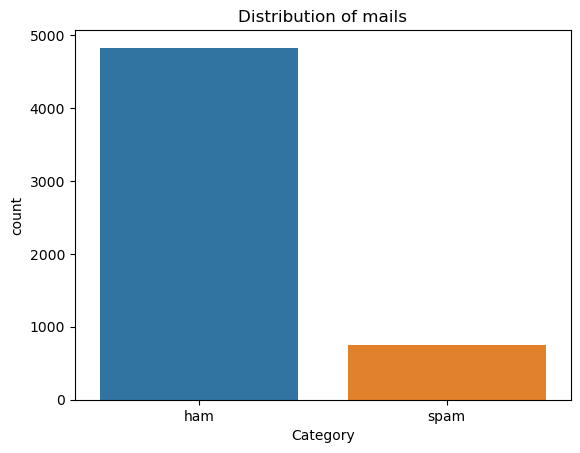

In [12]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

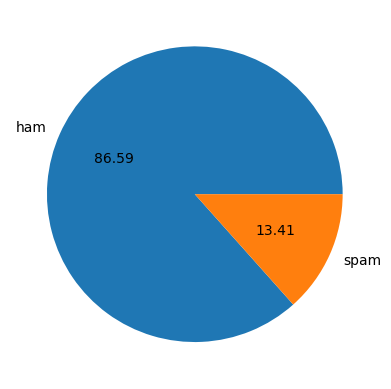

In [13]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# Data Preprocessing

## Label Encoding

In [14]:
# encoding "Category" Column
df.replace({'Category':{'spam':0}},inplace=True)

# encoding "Category" Column
df.replace({'Category':{'ham':1}},inplace=True)

df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


### Feature Scaling

In [21]:
# Separate the feature (message) and target (category) data
X = df["Message"]
y = df["Category"]

In [22]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [23]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Splitting the data into training data and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction

## TF-IDF Vectorizer

In [26]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [27]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [28]:
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model Selection and Training

### Naive Bayes Regression Model

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
# Initialize a classifier (e.g., Naive Bayes)
naive_b = MultinomialNB()

In [31]:
# Train the classifier on the TF-IDF transformed training data
naive_b.fit(X_train_tfidf, y_train)

MultinomialNB()

In [39]:
# Make predictions on the test set
y_preds = naive_b.predict(X_test_tfidf)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_preds)
confusion_matx = confusion_matrix(y_test, y_preds)
report = classification_report(y_test, y_preds)

In [44]:
print(f"Naive Bayes Accuracy Score: {accuracy:.2f}")
print(f'Confusion Matrix:\n{confusion_matx}')

# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Naive Bayes Accuracy Score: 0.97
Confusion Matrix:
[[119  31]
 [  0 965]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       150
           1       0.97      1.00      0.98       965

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [45]:
#Check the test score and train score to the Naive Bayes Regression algorithm
print(f'The Test_accuracy: {naive_b.score(X_test_tfidf, y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {naive_b.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 97.22
The Train_accuracy: 98.59


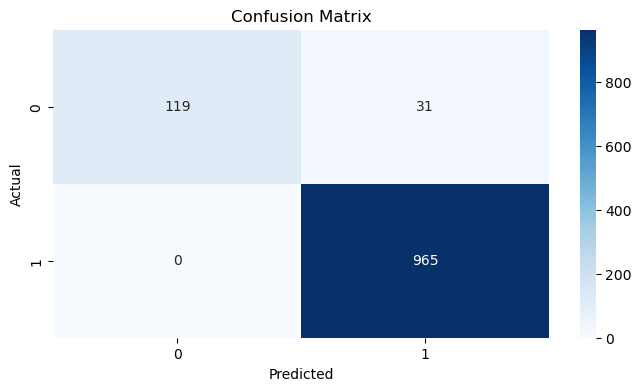

In [67]:
confusion_matx = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matx, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

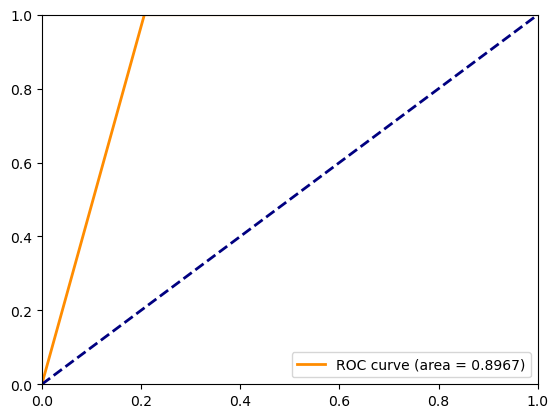

In [47]:
fpr, tpr, _ = roc_curve(y_test, y_preds)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

## Logistic Regresion Model

In [48]:
# Creating and Fit Logistic Regression Model
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train_tfidf, y_train)

LogisticRegression()

### Evaluating the trained model

In [49]:
# Make predictions on the test set
y_pred_sss = Log_Reg.predict(X_test_tfidf)

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_sss)
conf_matx = confusion_matrix(y_test, y_pred_sss)
report = classification_report(y_test, y_pred_sss)

In [52]:
print(f"Logistic Regression Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{conf_matx}')
# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Logistic Regression Accuracy Score: 0.96
Confusion Matrix:
[[106  44]
 [  3 962]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       150
           1       0.96      1.00      0.98       965

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



In [53]:
#Check the test score and train score to the Logistic Regresion algorithm
print(f'The Test_accuracy: {Log_Reg.score(X_test_tfidf,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {Log_Reg.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 95.78
The Train_accuracy: 97.04


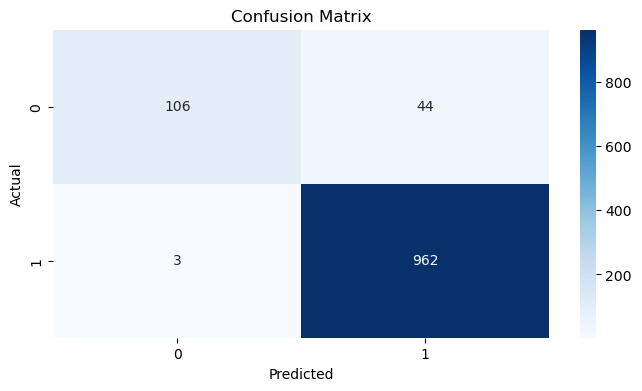

In [66]:
conf_matx = confusion_matrix(y_test, y_pred_sss)
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matx, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

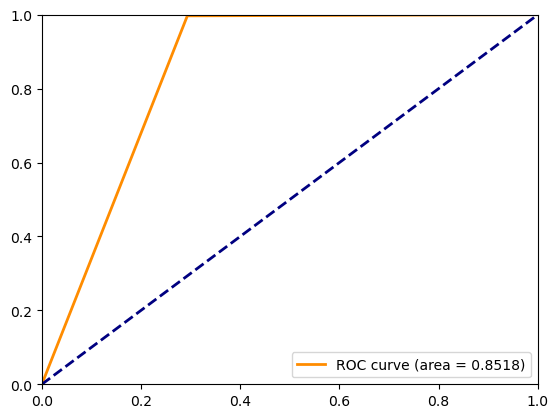

In [55]:
fpr, tpr, _ = roc_curve(y_test, y_pred_sss)
mnb_cv_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {mnb_cv_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine Model

In [56]:
from sklearn.svm import SVC

In [57]:
SVM = SVC(kernel='linear', C=1)

In [58]:
# Train the classifier on the TF-IDF transformed training data
SVM.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [59]:
# Make predictions on the test set
y_prediitttt = SVM.predict(X_test_tfidf)

In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_prediitttt)
confu_Matrix = confusion_matrix(y_test, y_prediitttt)
report = classification_report(y_test, y_prediitttt)

In [62]:
print(f"Logistic Regression Accuracy Score: {accuracy:.2f}")

print(f'Confusion Matrix:\n{confu_Matrix}')
# print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Logistic Regression Accuracy Score: 0.98
Confusion Matrix:
[[131  19]
 [  4 961]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [63]:
#Check the test score and train score to the Support Vector Machine algorithm
print(f'The Test_accuracy: {SVM.score(X_test_tfidf,y_test)*100:.2f}')

#Train score for the data
print(f'The Train_accuracy: {SVM.score(X_train_tfidf, y_train)*100:.2f}')

The Test_accuracy: 97.94
The Train_accuracy: 99.66


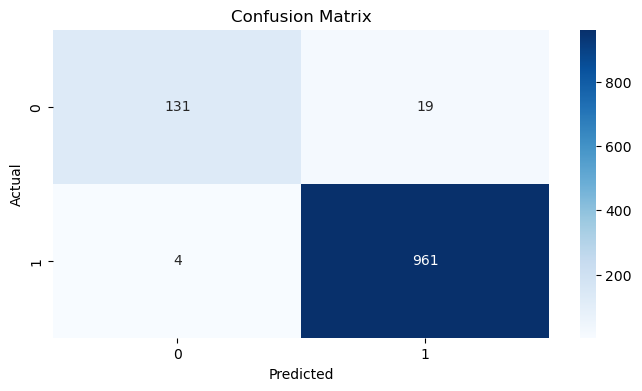

In [68]:
confu_Matrix = confusion_matrix(y_test, y_prediitttt)
plt.figure(figsize=(8, 4))
sns.heatmap(confu_Matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Test the model with an email messages

In [114]:
new_emails = [
    "Aight, I'll hit you up when I get some cash",
    "GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm",
    "Going for dinner.msg you after.",
    "Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML"]

# Transform the new emails using the same TF-IDF vectorizer
new_emails_features = tfidf_vectorizer.transform(new_emails)

# Make predictions using the trained model
predictions = naive_b.predict(new_emails_features)

# Output the predictions
for email, prediction in zip(new_emails, predictions):
    if prediction == 1:
        print(f"'{email}' is classified as Ham Mail")
    else:
        print(f"'{email}' is classified as Spam Mail")

'Aight, I'll hit you up when I get some cash' is classified as Ham Mail
'GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm' is classified as Spam Mail
'Going for dinner.msg you after.' is classified as Ham Mail
'Your free ringtone is waiting to be collected. Simply text the password \MIX" to 85069 to verify. Get Usher and Britney. FML' is classified as Spam Mail


# Project Report
## All Train, Test Accuracy Reports through visualization

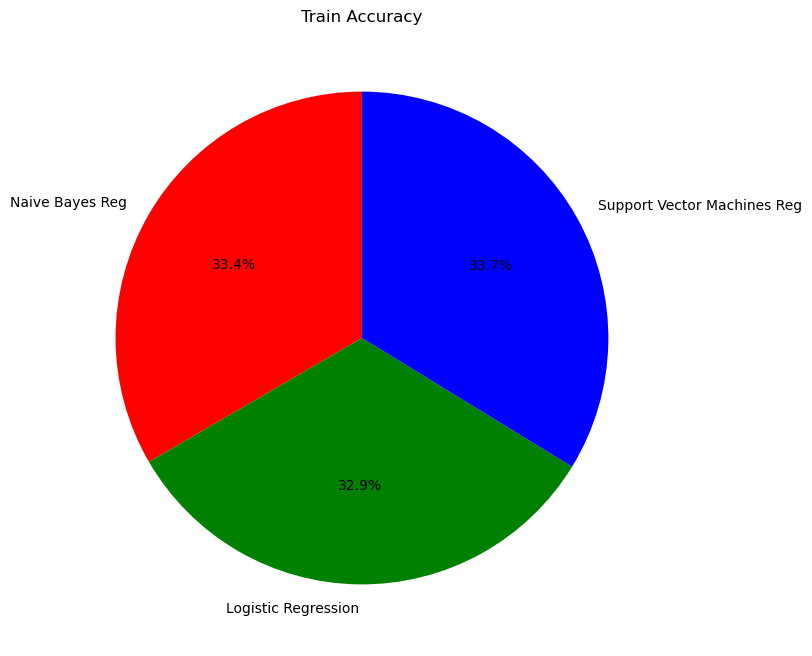

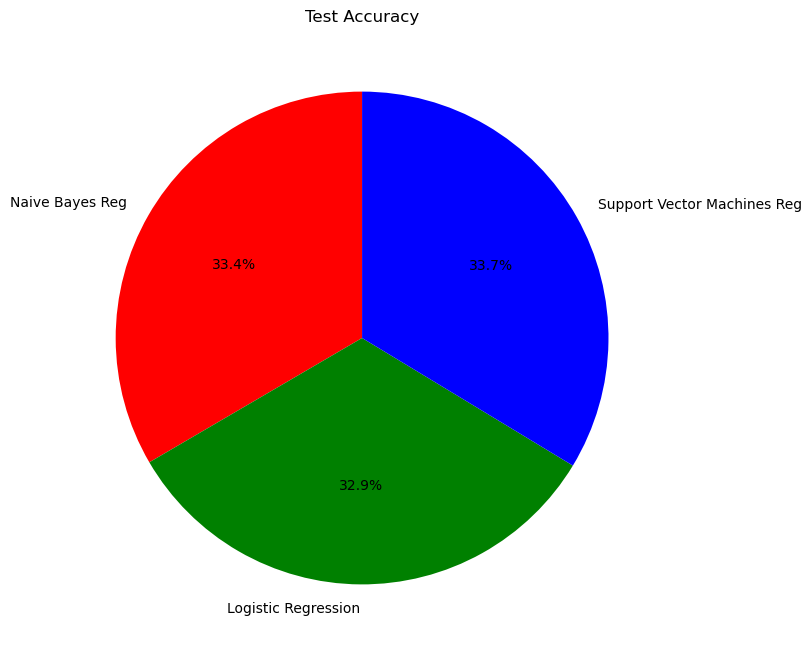

In [115]:
models = ["Naive Bayes Reg", "Logistic Regression", "Support Vector Machines Reg"]
train_accuracies = [98.59, 97.04, 99.66]
test_accuracies = [97.22, 95.78, 97.94]

# Set the colors for the pie chart
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(train_accuracies, labels=models, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Train Accuracy")
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(test_accuracies, labels=models, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Test Accuracy")
plt.show()

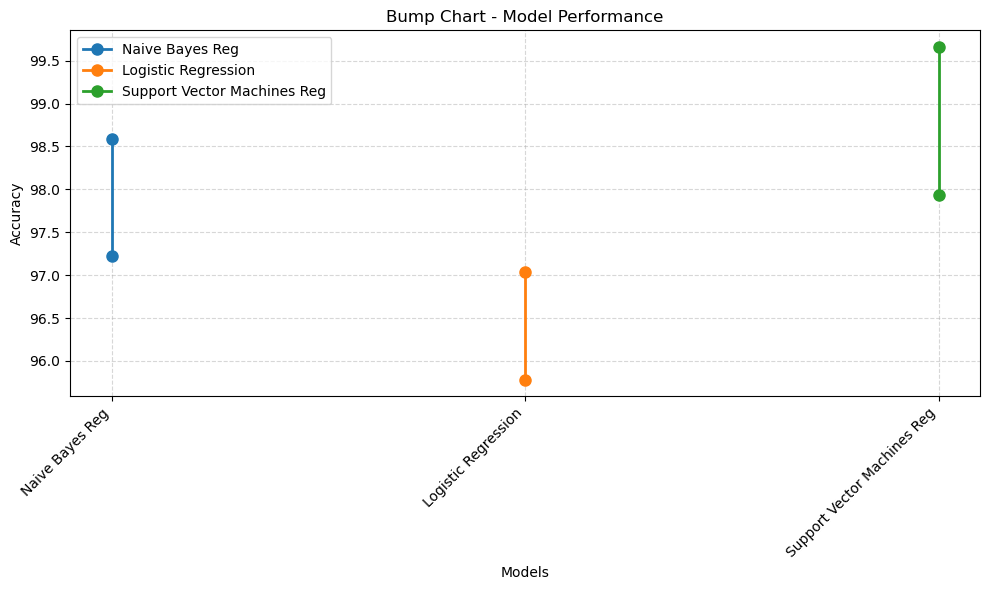

In [122]:
import matplotlib.pyplot as plt
import numpy as np

models = [ "Naive Bayes Reg", "Logistic Regression",  "Support Vector Machines Reg"]
train_accuracies = [98.59, 97.04, 99.66]  
test_accuracies = [97.22, 95.78, 97.94]  

# Set the width of the lines
line_width = 2

# Create an array of equally spaced positions for the lines
x = np.arange(len(models))

plt.figure(figsize=(10, 6))
# Create lines for each model connecting train and test accuracies
for i in range(len(models)):
    plt.plot([x[i], x[i]], [train_accuracies[i], test_accuracies[i]], marker='o', markersize=8, linewidth=line_width, label=models[i])

# Set title and labels
plt.title("Bump Chart - Model Performance")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(x, models, rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Thank You For Reading 